### --------------------
#### Dataset: US County Dataset.
#### Objective: Predicting the per capita cancer mortality.
#### Assumptions within the dataset: Ethnicity survey may be considered to have covered max 95% of the population, Average IncidenceRate may vary largely county to county
#### Observations are mentioned throughout the notebook and are numbered.
### --------------------

### Importing necessary packages and modules

In [1]:
import pandas as pd #data analysis and manipulation
import numpy as np #mathematical operations on multidimensional arrays
import matplotlib.pyplot as plt #plotting
%matplotlib inline

import seaborn as sns #plotting
import datetime #timekeeping

### Start time

In [2]:
print("Start Time: ", datetime.datetime.now())

Start Time:  2021-02-25 10:17:37.074288


### Loading Dataset

In [3]:
df = pd.read_csv("examdataset.csv", encoding = "ISO-8859-1")

#### Shape of the dataset, finding out number of rows and columns

In [4]:
df.shape

(3047, 34)

1. The data has 3047 rows and 34 columns

#### Setting pandas to show all the columns

In [28]:
pd.set_option("display.max_columns", 50)

#### Dataset Head. Viewing top 5 rows.

In [29]:
df.head()

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,County,State,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,TARGET_deathRate
0,1397.0,469,489.8,61898,260131,11.2,499.748204,39.3,36.9,41.7,Kitsap County,Washington,2.54,52.5,11.5,39.5,42.1,6.9,23.2,19.6,51.9,8.0,75.1,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831,164.9
1,173.0,70,411.6,48127,43269,18.6,23.111234,33.0,32.2,33.7,Kittitas County,Washington,2.34,44.5,6.1,22.4,64.0,7.5,26.0,22.7,55.9,7.8,70.2,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096,161.3
2,102.0,50,349.7,49348,21026,14.6,47.560164,45.0,44.0,45.8,Klickitat County,Washington,2.62,54.2,24.0,36.6,NaN,9.5,29.0,16.0,45.9,7.0,63.7,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488,174.7
3,427.0,202,430.4,44243,75882,17.1,342.637253,42.8,42.2,43.4,Lewis County,Washington,2.52,52.7,20.2,41.2,36.1,2.5,31.6,9.3,48.3,12.1,58.4,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841,194.8
4,57.0,26,350.1,49955,10321,12.5,0.000000,48.3,47.8,48.9,Lincoln County,Washington,2.34,57.8,14.9,43.0,40.0,2.0,33.4,15.0,48.2,4.8,61.6,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657,144.4


#### Now that we know the number of columns, let us find out the column names.

In [30]:
df.columns

Index(['avgAnnCount', 'avgDeathsPerYear', 'incidenceRate', 'medIncome',
       'popEst2015', 'povertyPercent', 'studyPerCap', 'MedianAge',
       'MedianAgeMale', 'MedianAgeFemale', 'County', 'State',
       'AvgHouseholdSize', 'PercentMarried', 'PctNoHS18_24', 'PctHS18_24',
       'PctSomeCol18_24', 'PctBachDeg18_24', 'PctHS25_Over',
       'PctBachDeg25_Over', 'PctEmployed16_Over', 'PctUnemployed16_Over',
       'PctPrivateCoverage', 'PctPrivateCoverageAlone', 'PctEmpPrivCoverage',
       'PctPublicCoverage', 'PctPublicCoverageAlone', 'PctWhite', 'PctBlack',
       'PctAsian', 'PctOtherRace', 'PctMarriedHouseholds', 'BirthRate',
       'TARGET_deathRate'],
      dtype='object')

#### What are the data types for the different columns?

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              3047 non-null   float64
 1   avgDeathsPerYear         3047 non-null   int64  
 2   incidenceRate            3043 non-null   float64
 3   medIncome                3047 non-null   int64  
 4   popEst2015               3047 non-null   int64  
 5   povertyPercent           3047 non-null   float64
 6   studyPerCap              3047 non-null   float64
 7   MedianAge                3047 non-null   float64
 8   MedianAgeMale            3047 non-null   float64
 9   MedianAgeFemale          3047 non-null   float64
 10  County                   3047 non-null   object 
 11  State                    3047 non-null   object 
 12  AvgHouseholdSize         3047 non-null   float64
 13  PercentMarried           3047 non-null   float64
 14  PctNoHS18_24            

2. As we can see above, data types are as follows: float64 - 29 attributes, int64 - 3 attributes, object - 2 attributes

#### Any null values within the data?

In [26]:
df.isnull().sum()

avgAnnCount                   0
avgDeathsPerYear              0
incidenceRate                 4
medIncome                     0
popEst2015                    0
povertyPercent                0
studyPerCap                   0
MedianAge                     0
MedianAgeMale                 0
MedianAgeFemale               0
County                        0
State                         0
AvgHouseholdSize              0
PercentMarried                0
PctNoHS18_24                  0
PctHS18_24                    0
PctSomeCol18_24            2285
PctBachDeg18_24               0
PctHS25_Over                  0
PctBachDeg25_Over             0
PctEmployed16_Over          152
PctUnemployed16_Over          0
PctPrivateCoverage            0
PctPrivateCoverageAlone     609
PctEmpPrivCoverage            0
PctPublicCoverage             0
PctPublicCoverageAlone        0
PctWhite                     40
PctBlack                      0
PctAsian                      0
PctOtherRace                  0
PctMarri

3. Some columns have missing values. In "PctSomeCol18_24" majority values are missing while they are significant in "PctPrivateCoverageAlone" as well.

In [31]:
df['PctSomeCol18_24'].mean()

40.977034120734906

In [13]:
df['PctSomeCol18_24'].median()

40.4

In [14]:
df['PctSomeCol18_24'].mode()

0    43.0
dtype: float64

#### Statistical Summary of the dataset.

In [32]:
df.describe(percentiles = [0.005, 0.01, 0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99, 0.995])

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,TARGET_deathRate
count,3047.000000,3047.000000,3043.000000,3047.000000,3.047000e+03,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,762.000000,3047.000000,3047.000000,3047.000000,2895.000000,3047.000000,3047.000000,2438.000000,3047.000000,3047.000000,3047.000000,3007.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000
mean,606.338544,185.965868,448.287128,47063.281917,1.026374e+05,16.878175,155.399415,45.272333,39.570725,42.145323,2.479662,51.773679,18.224450,35.002068,40.977034,6.158287,34.804660,13.282015,54.152642,7.852412,64.354939,48.453774,41.196324,36.252642,19.240072,83.532785,9.107978,1.253965,1.983523,51.243872,5.640306,178.664063
std,1416.356223,504.134286,54.589676,12040.090836,3.290592e+05,6.409087,529.628366,45.304480,5.226017,5.292849,0.429174,6.896928,8.093064,9.069722,11.115805,4.529059,7.034924,5.394756,8.315064,3.452371,10.647057,10.083006,9.447687,7.841741,6.113041,16.446357,14.534538,2.610276,3.517710,6.572814,1.985816,27.751511
min,6.000000,3.000000,201.300000,22640.000000,8.270000e+02,3.200000,0.000000,22.300000,22.400000,22.300000,0.022100,23.100000,0.000000,0.000000,7.100000,0.000000,7.500000,2.500000,17.600000,0.400000,22.300000,15.700000,13.500000,11.200000,2.600000,10.199155,0.000000,0.000000,0.000000,22.992490,0.000000,59.700000
0.5%,9.000000,4.000000,276.288000,26110.830000,1.646130e+03,5.146000,0.000000,26.123000,25.346000,26.523000,0.024200,28.500000,2.346000,12.200000,11.361000,0.000000,14.969000,4.400000,29.647000,0.900000,33.500000,24.218500,19.046000,16.800000,6.200000,20.410381,0.000000,0.000000,0.000000,28.137080,1.113537,106.100000
1%,11.000000,4.000000,297.578000,27438.880000,1.905040e+03,6.000000,0.000000,27.900000,26.600000,28.646000,0.024900,30.292000,3.500000,13.400000,14.149000,0.000000,16.800000,4.746000,32.194000,1.200000,36.138000,25.800000,20.600000,18.546000,7.400000,25.837015,0.000000,0.000000,0.000000,31.653827,1.547823,114.246000
5%,23.000000,9.000000,355.110000,31837.700000,3.666200e+03,8.300000,0.000000,31.930000,31.000000,32.900000,2.140000,39.300000,6.900000,20.400000,24.515000,0.500000,22.230000,6.400000,39.970000,2.800000,46.400000,32.485000,26.000000,23.000000,10.000000,47.835004,0.100679,0.000000,0.014080,39.730604,2.874904,134.130000
10%,37.000000,14.000000,380.740000,34212.000000,5.795800e+03,9.800000,0.000000,34.500000,33.200000,35.400000,2.240000,43.060000,9.000000,23.660000,27.810000,1.400000,25.600000,7.400000,43.500000,3.800000,50.300000,35.300000,28.900000,26.100000,11.800000,60.069900,0.248495,0.057804,0.089199,43.108770,3.562945,145.400000
25%,76.000000,28.000000,420.300000,38882.500000,1.168400e+04,12.150000,0.000000,37.700000,36.350000,39.100000,2.370000,47.750000,12.800000,29.200000,34.000000,3.100000,30.400000,9.400000,48.600000,5.500000,57.200000,41.000000,34.500000,30.900000,14.850000,77.046521,0.620675,0.254199,0.295172,47.763063,4.521419,161.200000
50%,171.000000,61.000000,453.549422,45207.000000,2.664300e+04,15.900000,0.000000,41.000000,39.600000,42.400000,2.500000,52.400000,17.100000,34.700000,40.400000,5.400000,35.300000,12.300000,54.500000,7.600000,65.100000,48.700000,41.100000,36.300000,18.800000,89.981512,2.247576,0.549812,0.826185,51.669941,5.381478,178.100000


More percentiles to get an idea of distribution of data as well as an intuin for outliers. 

4. In quite a lot of columns, the max value is significantly higher than the 99.5% value. This indicates the likelihood of outliers.
5. Data is of varying range for different attributes. Will need scaling.
6. Need to get more idea through the visual eda.

#### Plotting histograms to get an idea of data distribution

array([[<AxesSubplot:title={'center':'avgAnnCount'}>,
        <AxesSubplot:title={'center':'avgDeathsPerYear'}>,
        <AxesSubplot:title={'center':'incidenceRate'}>,
        <AxesSubplot:title={'center':'medIncome'}>,
        <AxesSubplot:title={'center':'popEst2015'}>,
        <AxesSubplot:title={'center':'povertyPercent'}>],
       [<AxesSubplot:title={'center':'studyPerCap'}>,
        <AxesSubplot:title={'center':'MedianAge'}>,
        <AxesSubplot:title={'center':'MedianAgeMale'}>,
        <AxesSubplot:title={'center':'MedianAgeFemale'}>,
        <AxesSubplot:title={'center':'AvgHouseholdSize'}>,
        <AxesSubplot:title={'center':'PercentMarried'}>],
       [<AxesSubplot:title={'center':'PctNoHS18_24'}>,
        <AxesSubplot:title={'center':'PctHS18_24'}>,
        <AxesSubplot:title={'center':'PctSomeCol18_24'}>,
        <AxesSubplot:title={'center':'PctBachDeg18_24'}>,
        <AxesSubplot:title={'center':'PctHS25_Over'}>,
        <AxesSubplot:title={'center':'PctBachDeg25_O

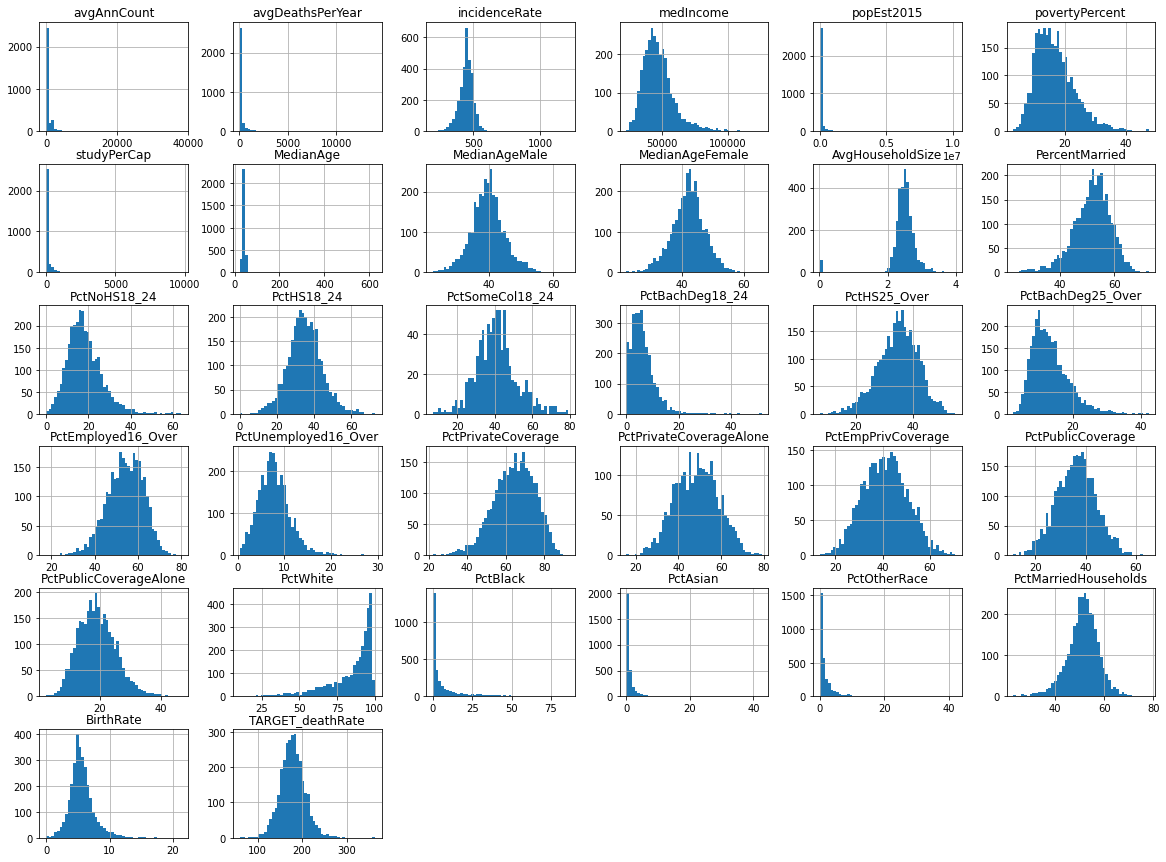

In [19]:
df.hist(bins = 50, figsize = (20, 15))

#### Normally Distributed - Target_deathRate, PctPublicCoverageAlone, PctPrivateCoverageAlone, PctEmpPrivCoverage, MedianAge columns
#### Skewed - Others such as medIncome, avgDeathsPerYear, PctBachDeg25_Over, PctWhite

In [23]:
df.columns

Index(['avgAnnCount', 'avgDeathsPerYear', 'incidenceRate', 'medIncome',
       'popEst2015', 'povertyPercent', 'studyPerCap', 'MedianAge',
       'MedianAgeMale', 'MedianAgeFemale', 'County', 'State',
       'AvgHouseholdSize', 'PercentMarried', 'PctNoHS18_24', 'PctHS18_24',
       'PctSomeCol18_24', 'PctBachDeg18_24', 'PctHS25_Over',
       'PctBachDeg25_Over', 'PctEmployed16_Over', 'PctUnemployed16_Over',
       'PctPrivateCoverage', 'PctPrivateCoverageAlone', 'PctEmpPrivCoverage',
       'PctPublicCoverage', 'PctPublicCoverageAlone', 'PctWhite', 'PctBlack',
       'PctAsian', 'PctOtherRace', 'PctMarriedHouseholds', 'BirthRate',
       'TARGET_deathRate'],
      dtype='object')

7. Majority of the numerical attributes are normally distributed. Some are skewed. We will perform futher EDA to understand this behavior.

### Before proceeding futher, splitting into Train - Test set.

In [33]:
from sklearn.model_selection import train_test_split #using the sklearn module to do the split.

df_train, df_test = train_test_split(df, test_size = 0.2, random_state = 42) #80% train, 20% test

In [34]:
print("Train set shape: {}, Test set shape: {}".format(df_train.shape, df_test.shape))

Train set shape: (2437, 34), Test set shape: (610, 34)


8. The data has been split into 80% train set and 20% test set.
9. We will do all the EDA only on the train set.
10. Post EDA, even the target variable will be separated from the sets.
11. In preprocessing, fit will be performed only on the train data and transform on both train and test data.
12. All this ensures that there is no data leakage and our model is sound.

### Exploratory Data Analysis | Data Visualisation

#### Correlation Matrix 

<AxesSubplot:>

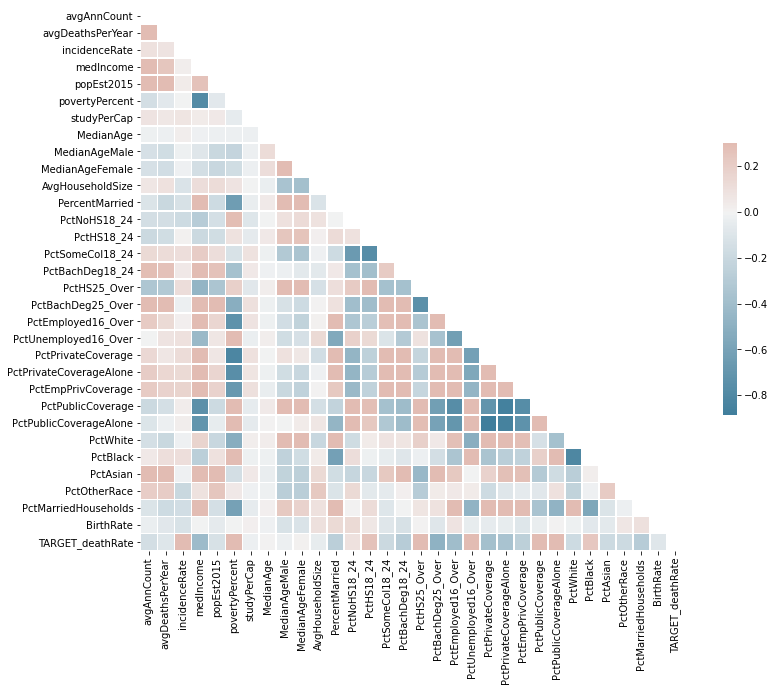

In [35]:
corr = df_train.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(14, 10))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
    square=True, linewidths=.5, cbar_kws={"shrink": .5})

In numerical form

In [46]:
corr

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,TARGET_deathRate
avgAnnCount,1.000000,0.925626,0.088350,0.295861,0.910854,-0.145319,0.075953,-0.023965,-0.133748,-0.131901,0.065251,-0.109156,-0.151278,-0.190669,0.128736,0.289143,-0.331962,0.341117,0.214424,-0.005104,0.141233,0.208581,0.217698,-0.186401,-0.098885,-0.141930,0.045524,0.439266,0.204626,-0.107777,-0.031464,-0.149912
avgDeathsPerYear,0.925626,1.000000,0.076413,0.245895,0.974259,-0.071693,0.058785,-0.026164,-0.161330,-0.157142,0.089728,-0.196212,-0.146813,-0.158627,0.117859,0.267851,-0.315631,0.314789,0.134610,0.080602,0.060274,0.144992,0.174659,-0.143125,-0.027392,-0.196921,0.104429,0.452081,0.210164,-0.172893,-0.076785,-0.093956
incidenceRate,0.088350,0.076413,1.000000,0.019391,0.038901,-0.010090,0.073135,0.020041,-0.022966,-0.014669,-0.116387,-0.128790,-0.180864,0.004596,0.102149,0.049018,0.110339,-0.024682,0.015807,0.094092,0.123323,0.131875,0.168641,0.029980,0.023505,-0.013750,0.107512,-0.011832,-0.199907,-0.154203,-0.124382,0.444477
medIncome,0.295861,0.245895,0.019391,1.000000,0.267224,-0.784641,0.037770,-0.012658,-0.086471,-0.146882,0.111004,0.341751,-0.289180,-0.193089,0.210340,0.486549,-0.461591,0.691034,0.687093,-0.435474,0.716668,0.779147,0.741174,-0.743877,-0.709088,0.167088,-0.268968,0.426291,0.084977,0.437185,-0.004723,-0.416416
popEst2015,0.910854,0.974259,0.038901,0.267224,1.000000,-0.072925,0.052014,-0.026243,-0.198813,-0.200420,0.120223,-0.177595,-0.139819,-0.165511,0.113264,0.266041,-0.343376,0.330424,0.156298,0.060579,0.059649,0.156950,0.179331,-0.181942,-0.046556,-0.205498,0.094852,0.486984,0.241330,-0.140806,-0.059012,-0.130041
povertyPercent,-0.145319,-0.071693,-0.010090,-0.784641,-0.072925,1.000000,-0.056348,-0.027584,-0.226677,-0.161662,0.077727,-0.645932,0.290857,0.085634,-0.122980,-0.372531,0.186283,-0.519148,-0.730319,0.644260,-0.818367,-0.755880,-0.680198,0.637856,0.791602,-0.519743,0.514253,-0.146761,0.048308,-0.608776,-0.007869,0.413158
studyPerCap,0.075953,0.058785,0.073135,0.037770,0.052014,-0.056348,1.000000,-0.024914,-0.028456,-0.026352,-0.002304,-0.040647,-0.090336,-0.060679,0.083320,0.054405,-0.082229,0.100215,0.081370,-0.028886,0.092722,0.068951,0.096969,-0.051199,-0.060154,0.024020,-0.015226,0.050406,-0.012346,-0.053571,0.013606,-0.024642
MedianAge,-0.023965,-0.026164,0.020041,-0.012658,-0.026243,-0.027584,-0.024914,1.000000,0.120033,0.114718,-0.030148,0.043784,-0.002747,0.053729,-0.019274,-0.012314,0.023886,-0.016272,-0.015113,0.019774,-0.002640,-0.022527,-0.040224,0.044349,-0.000789,0.027800,-0.015937,-0.035590,-0.022313,0.013288,-0.010804,-0.000077
MedianAgeMale,-0.133748,-0.161330,-0.022966,-0.086471,-0.198813,-0.226677,-0.028456,0.120033,1.000000,0.933502,-0.354596,0.460977,0.091414,0.249041,-0.313868,-0.027933,0.316481,-0.127407,-0.154429,-0.162410,0.093331,-0.160092,-0.198920,0.399464,-0.008552,0.410386,-0.246669,-0.238194,-0.271729,0.231785,-0.119731,-0.027953
MedianAgeFemale,-0.131901,-0.157142,-0.014669,-0.146882,-0.200420,-0.161662,-0.026352,0.114718,0.933502,1.000000,-0.381545,0.390282,0.128281,0.255861,-0.351422,-0.063815,0.344812,-0.177816,-0.239763,-0.134129,0.057145,-0.204603,-0.243017,0.455096,0.035144,0.355183,-0.161657,-0.262488,-0.272067,0.175645,-0.116085,0.008104


Correlations of all numerical attributes with the target variable

<AxesSubplot:title={'center':'Correlation with target'}>

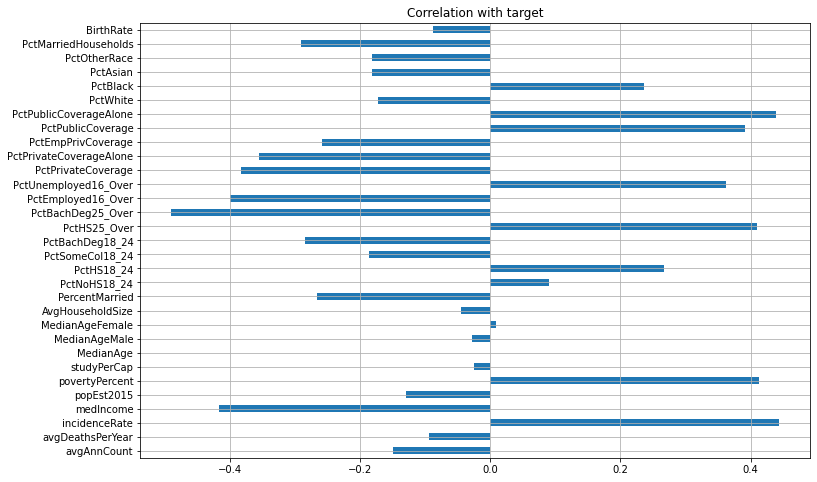

In [45]:
df_train.drop('TARGET_deathRate', axis = 1).corrwith(df_train['TARGET_deathRate']).plot(kind='barh', grid=True, figsize=(12, 8), 
                                                   title="Correlation with target")

In [44]:
corr['TARGET_deathRate']

avgAnnCount               -0.149912
avgDeathsPerYear          -0.093956
incidenceRate              0.444477
medIncome                 -0.416416
popEst2015                -0.130041
povertyPercent             0.413158
studyPerCap               -0.024642
MedianAge                 -0.000077
MedianAgeMale             -0.027953
MedianAgeFemale            0.008104
AvgHouseholdSize          -0.045399
PercentMarried            -0.266377
PctNoHS18_24               0.089955
PctHS18_24                 0.266599
PctSomeCol18_24           -0.186140
PctBachDeg18_24           -0.284393
PctHS25_Over               0.409766
PctBachDeg25_Over         -0.491238
PctEmployed16_Over        -0.400049
PctUnemployed16_Over       0.362350
PctPrivateCoverage        -0.382660
PctPrivateCoverageAlone   -0.355050
PctEmpPrivCoverage        -0.258673
PctPublicCoverage          0.391647
PctPublicCoverageAlone     0.439718
PctWhite                  -0.173110
PctBlack                   0.236611
PctAsian                  -0

13. The Target Attribute has very low(poor) correlation with a few attributes. These attrbutes can be dropped during preprocessing if linear regression were to be performed. 

### Attributes having correlation less than 0.01 with the target variable

In [39]:
abs(corr['TARGET_deathRate']) > 0.01

avgAnnCount                 True
avgDeathsPerYear            True
incidenceRate               True
medIncome                   True
popEst2015                  True
povertyPercent              True
studyPerCap                 True
MedianAge                  False
MedianAgeMale               True
MedianAgeFemale            False
AvgHouseholdSize            True
PercentMarried              True
PctNoHS18_24                True
PctHS18_24                  True
PctSomeCol18_24             True
PctBachDeg18_24             True
PctHS25_Over                True
PctBachDeg25_Over           True
PctEmployed16_Over          True
PctUnemployed16_Over        True
PctPrivateCoverage          True
PctPrivateCoverageAlone     True
PctEmpPrivCoverage          True
PctPublicCoverage           True
PctPublicCoverageAlone      True
PctWhite                    True
PctBlack                    True
PctAsian                    True
PctOtherRace                True
PctMarriedHouseholds        True
BirthRate 

#### Multicollinearity

<AxesSubplot:>

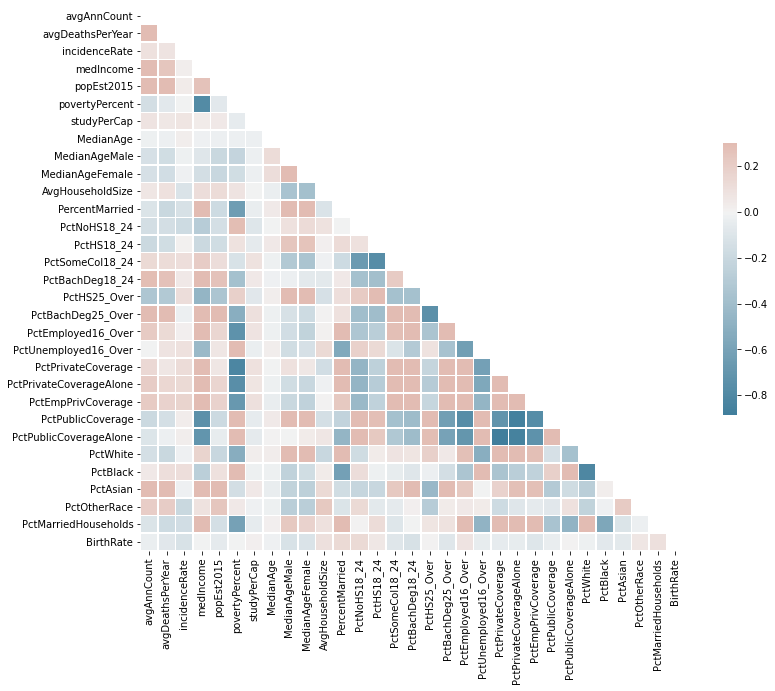

In [42]:
corr1 = df_train.drop('TARGET_deathRate', axis = 1).corr()
mask = np.triu(np.ones_like(corr1, dtype=bool))
f, ax = plt.subplots(figsize=(14, 10))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr1, mask=mask, cmap=cmap, vmax=.3, center=0,
    square=True, linewidths=.5, cbar_kws={"shrink": .5})

14. There is a high collinearity in the data among some of the features/attributes. This would constitute as multicollinearity and is not a desirable thing for modelling our data.
15. Let us assume that is there is a correlation greater than 0.5 between the feature attributes, that is too high for our model's performance. Which are those? The following cell presents that.

In [43]:
abs(corr1) > 0.5

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
avgAnnCount,True,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
avgDeathsPerYear,True,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
incidenceRate,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
medIncome,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,True,True,False,True,True,True,True,True,False,False,False,False,False,False
popEst2015,True,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
povertyPercent,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,False,False,True,False
studyPerCap,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
MedianAge,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
MedianAgeMale,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
MedianAgeFemale,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


16. The "True" values indicate pairs which have a high multicollinearity.
17. For example, poverty shows high collinearity with lot of factors. Including all these in our dataset might prove counterintuitive.

### Scatter Matrix. Attrbutes with corelation greater than 0.2.

In [47]:
abs(corr['TARGET_deathRate']) > 0.2 #features having atleast 0.2 corelation with the target variable

avgAnnCount                False
avgDeathsPerYear           False
incidenceRate               True
medIncome                   True
popEst2015                 False
povertyPercent              True
studyPerCap                False
MedianAge                  False
MedianAgeMale              False
MedianAgeFemale            False
AvgHouseholdSize           False
PercentMarried              True
PctNoHS18_24               False
PctHS18_24                  True
PctSomeCol18_24            False
PctBachDeg18_24             True
PctHS25_Over                True
PctBachDeg25_Over           True
PctEmployed16_Over          True
PctUnemployed16_Over        True
PctPrivateCoverage          True
PctPrivateCoverageAlone     True
PctEmpPrivCoverage          True
PctPublicCoverage           True
PctPublicCoverageAlone      True
PctWhite                   False
PctBlack                    True
PctAsian                   False
PctOtherRace               False
PctMarriedHouseholds        True
BirthRate 

array([[<AxesSubplot:xlabel='incidenceRate', ylabel='incidenceRate'>,
        <AxesSubplot:xlabel='medIncome', ylabel='incidenceRate'>,
        <AxesSubplot:xlabel='povertyPercent', ylabel='incidenceRate'>,
        <AxesSubplot:xlabel='PercentMarried', ylabel='incidenceRate'>,
        <AxesSubplot:xlabel='PctHS18_24', ylabel='incidenceRate'>,
        <AxesSubplot:xlabel='PctBachDeg18_24', ylabel='incidenceRate'>,
        <AxesSubplot:xlabel='PctHS25_Over', ylabel='incidenceRate'>,
        <AxesSubplot:xlabel='PctBachDeg25_Over', ylabel='incidenceRate'>,
        <AxesSubplot:xlabel='PctEmployed16_Over', ylabel='incidenceRate'>,
        <AxesSubplot:xlabel='PctUnemployed16_Over', ylabel='incidenceRate'>,
        <AxesSubplot:xlabel='PctPrivateCoverage', ylabel='incidenceRate'>,
        <AxesSubplot:xlabel='PctPrivateCoverageAlone', ylabel='incidenceRate'>,
        <AxesSubplot:xlabel='PctEmpPrivCoverage', ylabel='incidenceRate'>,
        <AxesSubplot:xlabel='PctPublicCoverage', ylabel='i

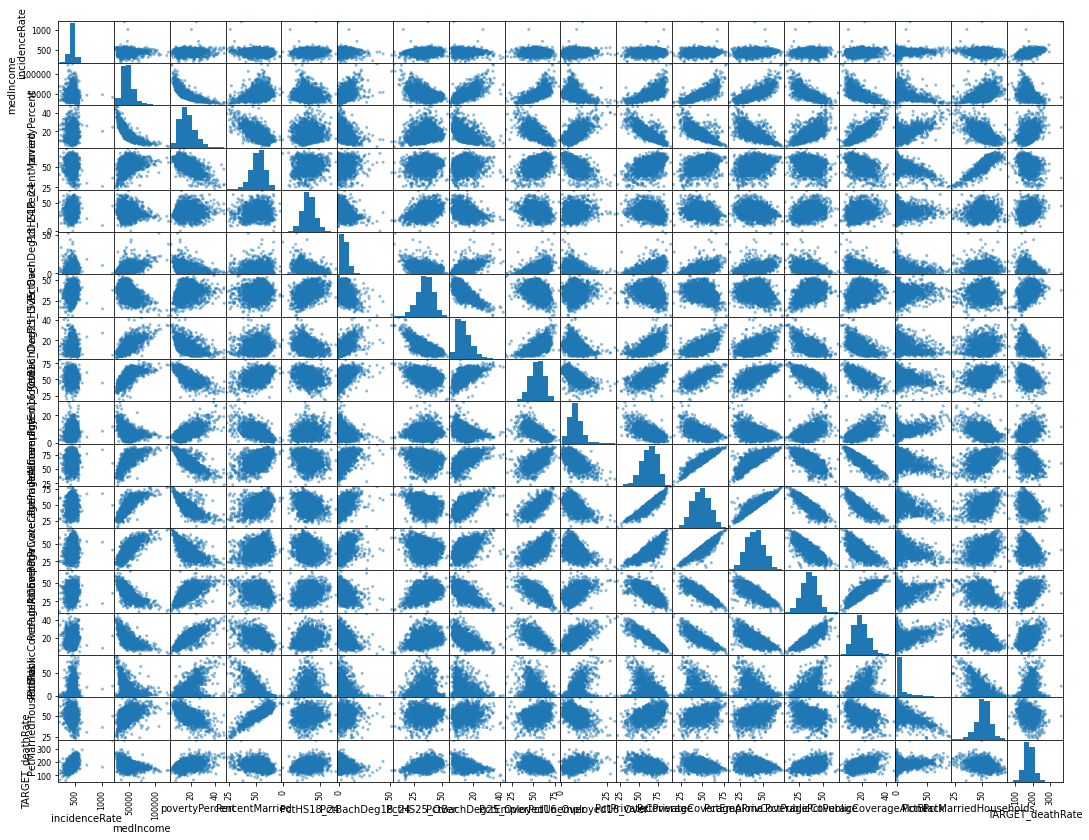

In [48]:
from pandas.plotting import scatter_matrix

attributes = df_train.drop(['avgAnnCount', 'avgDeathsPerYear', "popEst2015", 'studyPerCap', 'MedianAge',
                           'MedianAgeMale', 'MedianAgeFemale', 'AvgHouseholdSize', 'PctNoHS18_24', 'PctSomeCol18_24',
                           'PctWhite', 'PctAsian', 'PctOtherRace', 'BirthRate'], axis = 1) # dropping columns with low corelations
scatter_matrix(attributes, figsize=(18, 14))

### Preprocessing

- Separating X and y

In [49]:
X_train = df_train.drop('TARGET_deathRate', axis = 1)
y_train = df_train['TARGET_deathRate']

X_test = df_test.drop('TARGET_deathRate', axis = 1)
y_test = df_test['TARGET_deathRate']

In [50]:
X_train.shape

(2437, 33)

In [51]:
y_train.shape

(2437,)

In [52]:
X_test.shape

(610, 33)

In [53]:
y_train.shape

(2437,)

In [54]:
X_train['County'].value_counts()

Jefferson County              23
Washington County             22
Franklin County               19
Jackson County                18
Madison County                16
                              ..
Roger Mills County             1
Sharp County                   1
Columbiana County              1
Aleutians West Census Area     1
Haralson County                1
Name: County, Length: 1532, dtype: int64

In [55]:
X_test['County'].value_counts()

Clay County          10
Washington County     8
Lincoln County        7
Douglas County        5
Lee County            4
                     ..
McCormick County      1
Wetzel County         1
St. Louis County      1
Maries County         1
Laclede County        1
Name: County, Length: 483, dtype: int64

In [79]:
from sklearn.preprocessing import StandardScaler #For scaling. As most of the data is normally distributed
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder #For encoding categorical data
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer # To replace missing values

num_impute_mean_pipeline = Pipeline([
    ('imputer_mean', SimpleImputer(strategy = 'mean')), # Mean imputation for normally distributed attributes
])

num_impute_median_pipeline = Pipeline([
    ('imputer_median', SimpleImputer(strategy = 'median')), # Median imputation for skew distributed attributes
])

num_pipeline = Pipeline([
    ('std_scaler', StandardScaler()), # StandardScaler for scaling. Majority distributions are normal or just slightly skewed with tall peaks. 
    ])

cat_pipeline = Pipeline([
    ('cat_encoder', OneHotEncoder(sparse = False, handle_unknown = 'ignore')), #Sparse false or else the number of counties and states will lead to very high dimensions
])
# ignore unknown as there are some different counties in the train and test set.


mean_impute_attribs = ['PctSomeCol18_24', 'PctEmployed16_Over'] # Normally distributed attributes
median_impute_attribs = ['PctEmployed16_Over', 'PctWhite'] # Skew distributed attributes
num_attribs = list(X_train.select_dtypes(include = np.number)) # Passing numerical features to numerical pipeline
cat_attribs = list(X_train.select_dtypes(include = 'object')) # Passing categorical features to categorical pipeline


full_pipeline = ColumnTransformer([
        ('mean_imputer', num_impute_mean_pipeline, mean_impute_attribs),
        ('median_imputer', num_impute_median_pipeline, median_impute_attribs),
        ("num_scaler", num_pipeline, num_attribs),
        ("cat", cat_pipeline, cat_attribs),
    ])

In [80]:
X_train_prepared = full_pipeline.fit_transform(X_train)

In [81]:
X_test_prepared = full_pipeline.transform(X_test)

In [82]:
X_train_prepared.shape

(2437, 1618)

In [83]:
X_test_prepared.shape

(610, 1618)

### Preprocessing done, final prepared datasets have 1618 features.

### End Time

In [84]:
print("End Time: ", datetime.datetime.now())

End Time:  2021-02-25 12:17:51.845186


### Comments

18. Standard scaling was used for scaling as the data is majorly normal distributed. 
19. OneHotEncoder for encoding categorical data with ignore set for unknown values. This is done as there are different categories in both the train and test splits.
20. For imputing missing values, mean strategy was used as the major missing value attributes skewed to an extent. 

### COMMENTS CONSOLIDATED AND FURTHER POINTS

1. The data has 3047 rows and 34 columns
2. As we can see above, data types are as follows: float64 - 29 attributes, int64 - 3 attributes, object - 2 attributes
3. Some columns have missing values. In "PctSomeCol18_24" majority values are missing while they are significant in "PctPrivateCoverageAlone" as well.
4. In quite a lot of columns, the max value is significantly higher than the 99.5% value. This indicates the likelihood of outliers.
5. Data is of varying range for different attributes. Will need scaling.
6. Need to get more idea through the visual eda.
7. Majority of the numerical attributes are normally distributed. Some are skewed. We will perform futher EDA to understand this behavior.
8. The data has been split into 80% train set and 20% test set.
9. We will do all the EDA only on the train set.
10. Post EDA, even the target variable will be separated from the sets.
11. In preprocessing, fit will be performed only on the train data and transform on both train and test data.
12. All this ensures that there is no data leakage and our model is sound.
13. The Target Attribute has very low(poor) correlation with a few attributes. These attrbutes can be dropped during preprocessing if linear regression were to be performed. 
14. There is a high collinearity in the data among some of the features/attributes. This would constitute as multicollinearity and is not a desirable thing for modelling our data.
15. Let us assume that is there is a correlation greater than 0.5 between the feature attributes, that is too high for our model's performance. Which are those? The following cell presents that.
16. The "True" values indicate pairs which have a high multicollinearity.
17. For example, poverty shows high collinearity with lot of factors. Including all these in our dataset might prove counterintuitive.
18. Standard scaling was used for scaling as the data is majorly normal distributed. 
19. OneHotEncoder for encoding categorical data with ignore set for unknown values. This is done as there are different categories in both the train and test splits.
20. For imputing missing values, mean strategy was used uniformly distributed attributes and median strategy was used for skew distributed attributes. 
21. The columns which are showing very low linear corelation with the target variable in the corr matrix will be dropped in case of linear regression.
22. For linear regression, lot of multicollinearity is there, those columns will be dropped too.